<a href="https://colab.research.google.com/github/AnaCampos8898998/Machine_Learning/blob/main/Proyecto_Final_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto primer corte**

---
Dataset de individuos con problemas cardiovasculares


---
Machine Learning, 2023

---
Elaborado: Ana Maria Campos Mora

---
Fecha: 31 de agosto del 2023


**Primer paso: Descripción de los datos inciales del data**

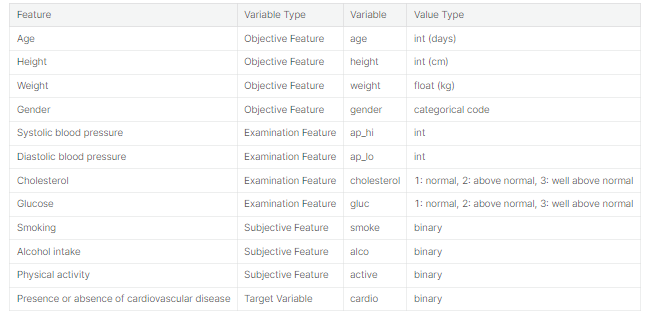

# **1. IMPORT LIBRARIES**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# seed our random values for reproducible code

import numpy as np
np.random.seed(0)
import random
random.seed(0)

In [ ]:
# seed our random values for reproducible code

import numpy as np
np.random.seed(0)
import random
random.seed(0)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

In [ ]:
import pandas as pd

cardio_train = pd.read_csv('/content/drive/MyDrive/Machine Learning/cardio_train (1).csv')
cardio_train_c = cardio_train.copy() # A copy of the dataset

# **2. EXPLORATORY DATA ANALYSIS**

In [ ]:
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
cardio_train.shape

(70000, 13)

In [ ]:
cardio_train.isnull().mean()  # percent of missing data in each column
# cardio (output) has no missing data.

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

In [ ]:
cardio_train['cardio'].value_counts(normalize=True)  # percent breakdown of response variable
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html#pandas-dataframe-value-counts

0    0.5003
1    0.4997
Name: cardio, dtype: float64

Esto quiere decir que el 50% no tiene problemas cardiovasculares y el 49% si tiene problemas cardiovasculares

In [ ]:
cardio_train.info() # Dtype corresponds to the type of data
# Object is qualitative data.
# float64 is quantitative data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


# **3. FEATURE IMPROVEMENT- No es necesario para este data**
Pero se utiliza para añadir una copia del data

3.1 Verificar la cantidad de columnas numericas dentro del data la cual debe ser inicialmente de 13

In [ ]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas

numerical_columns = cardio_train.select_dtypes(include=numeric_types).columns.tolist() # Put in a list the features with numerical format.

numerical_columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

# **3.2 Conversión de datos**

3.2.1 Realizar conversión de columnas del blood

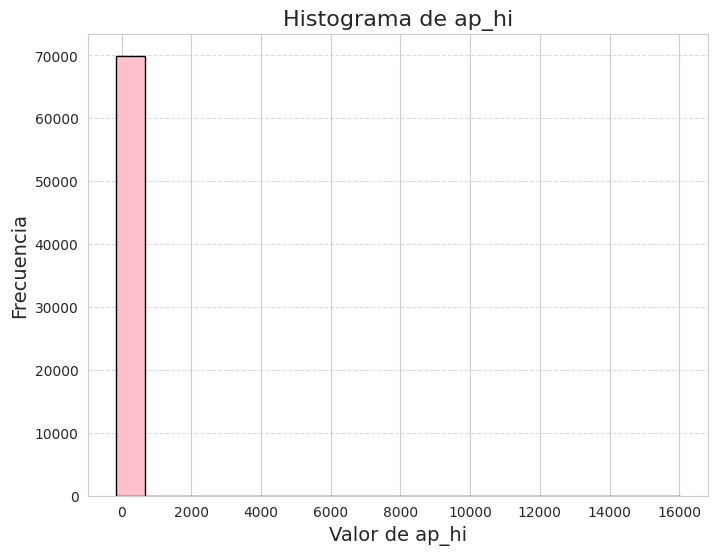

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(cardio_train['ap_hi'], color='pink', edgecolor='black', bins=20)
plt.title('Histograma de ap_hi', fontsize=16)
plt.xlabel('Valor de ap_hi', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


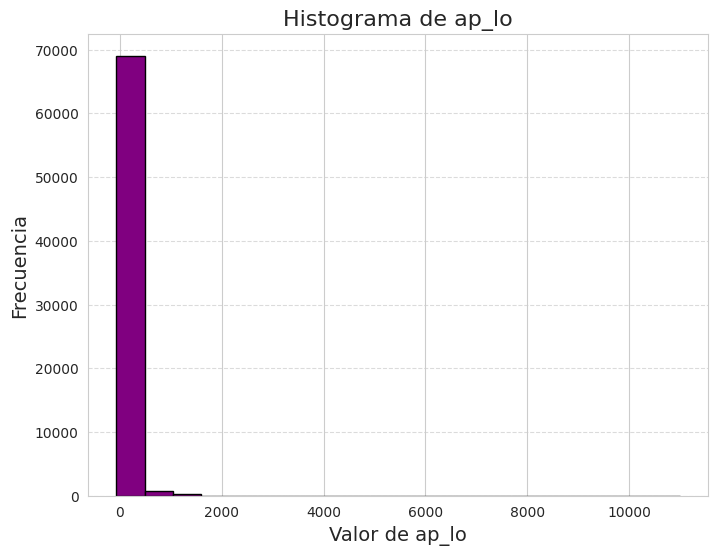

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que cardio_train es tu DataFrame
plt.figure(figsize=(8, 6))
plt.hist(cardio_train['ap_lo'], color='purple', edgecolor='black', bins=20)
plt.title('Histograma de ap_lo', fontsize=16)
plt.xlabel('Valor de ap_lo', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(cardio_train['ap_hi'].max())

16020


In [ ]:
print(cardio_train['ap_hi'].min())

-150


**3.2.1 Transformación logaritmica**

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

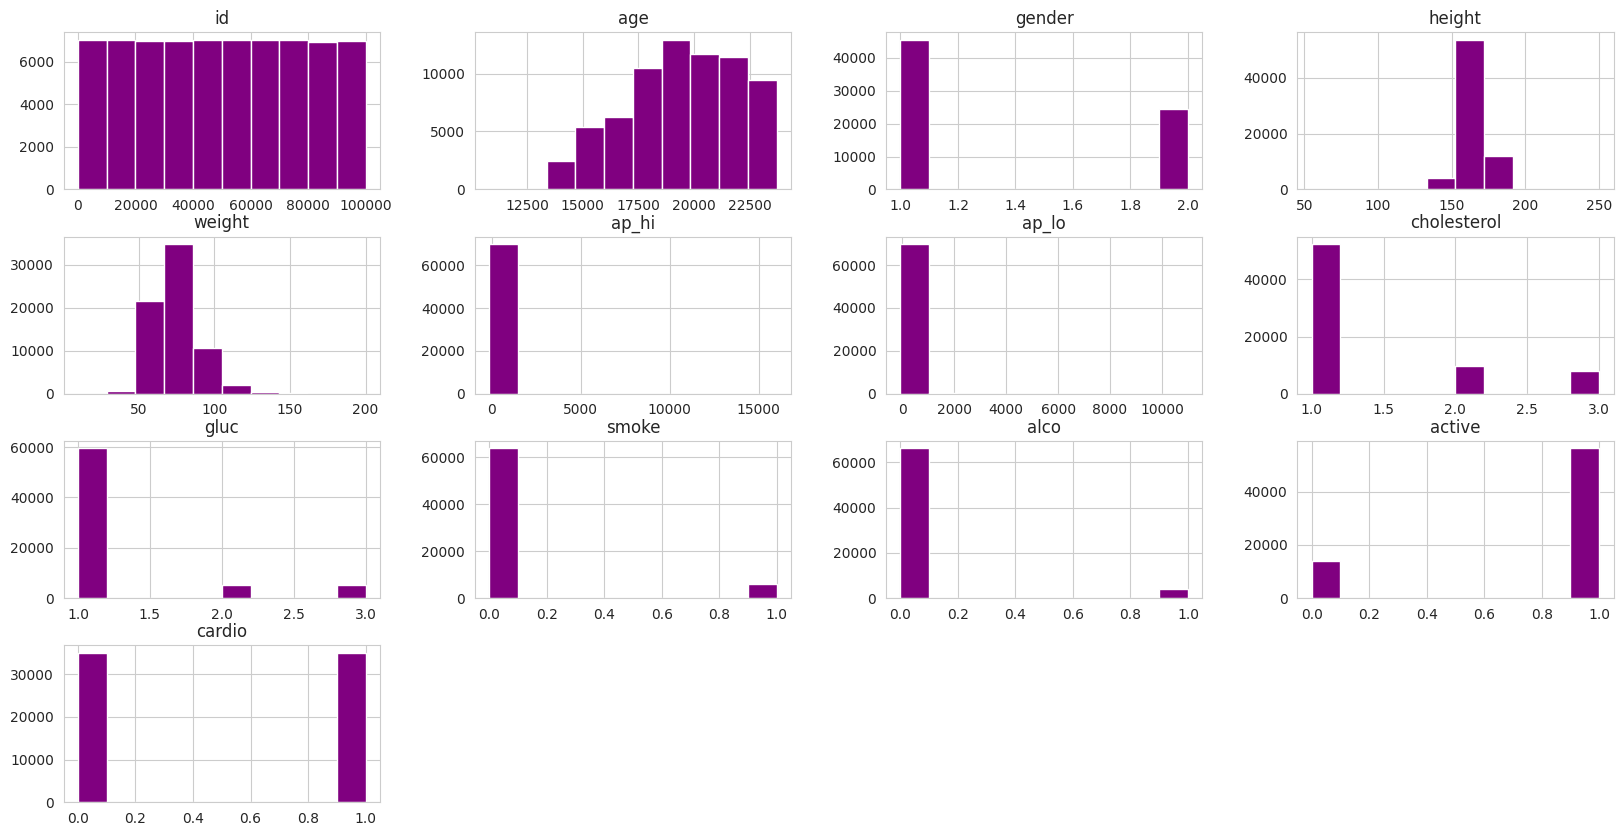

In [ ]:
cardio_train_c[numerical_columns].hist(figsize=(20, 10), color=['purple'])


/usr/local/lib/python3.10/dist-packages/pandas/core/base.py:890: RuntimeWarning: invalid value encountered in log1p
  new_values = map_f(values, mapper)


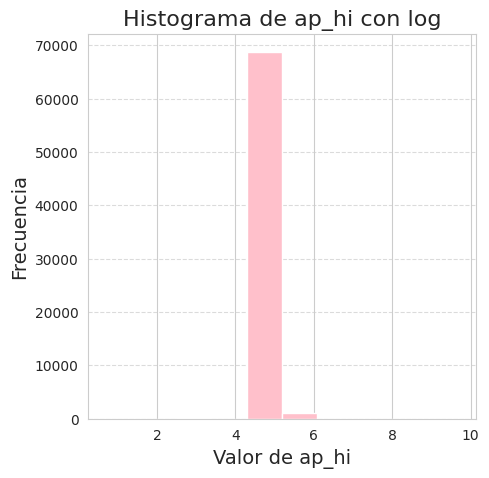

In [ ]:
cardio_train['ap_hi'].map(np.log1p).hist(figsize=(5, 5), color=['pink'])
plt.title('Histograma de ap_hi con log', fontsize=16)
plt.xlabel('Valor de ap_hi', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

----Variable de ap_lo-----

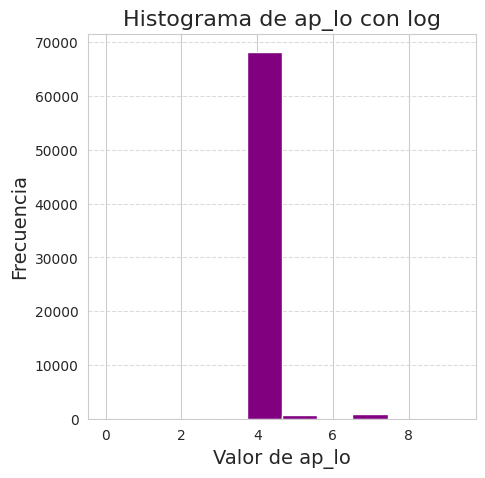

In [ ]:
cardio_train['ap_lo'].map(np.log1p).hist(figsize=(5, 5), color=['purple'])
plt.title('Histograma de ap_lo con log', fontsize=16)
plt.xlabel('Valor de ap_lo', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.2.2 Transformación Box-Cox**
# Esta parte al tener negativos no funciona por eso se hizo logaritmo -pedir explicación
---












In [ ]:
cardio_train['ap_hi'].min()

-150

In [ ]:
cardio_train[cardio_train['ap_hi']==-150].head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35040,50055,23325,2,168,59,-150,80,1,1,0,0,1,1


In [ ]:
#Si el valor minimo es 0
#cardio_train['ap_hi']= cardio_train['ap_hi'] + 0.01

,0,1,2,3
0,"Axes(0.125,0.722857;0.158163x0.157143)","Axes(0.330612,0.722857;0.158163x0.157143)","Axes(0.536224,0.722857;0.158163x0.157143)","Axes(0.741837,0.722857;0.158163x0.157143)"
1,"Axes(0.125,0.518571;0.158163x0.157143)","Axes(0.330612,0.518571;0.158163x0.157143)","Axes(0.536224,0.518571;0.158163x0.157143)","Axes(0.741837,0.518571;0.158163x0.157143)"
2,"Axes(0.125,0.314286;0.158163x0.157143)","Axes(0.330612,0.314286;0.158163x0.157143)","Axes(0.536224,0.314286;0.158163x0.157143)","Axes(0.741837,0.314286;0.158163x0.157143)"
3,"Axes(0.125,0.11;0.158163x0.157143)","Axes(0.330612,0.11;0.158163x0.157143)","Axes(0.536224,0.11;0.158163x0.157143)","Axes(0.741837,0.11;0.158163x0.157143)"


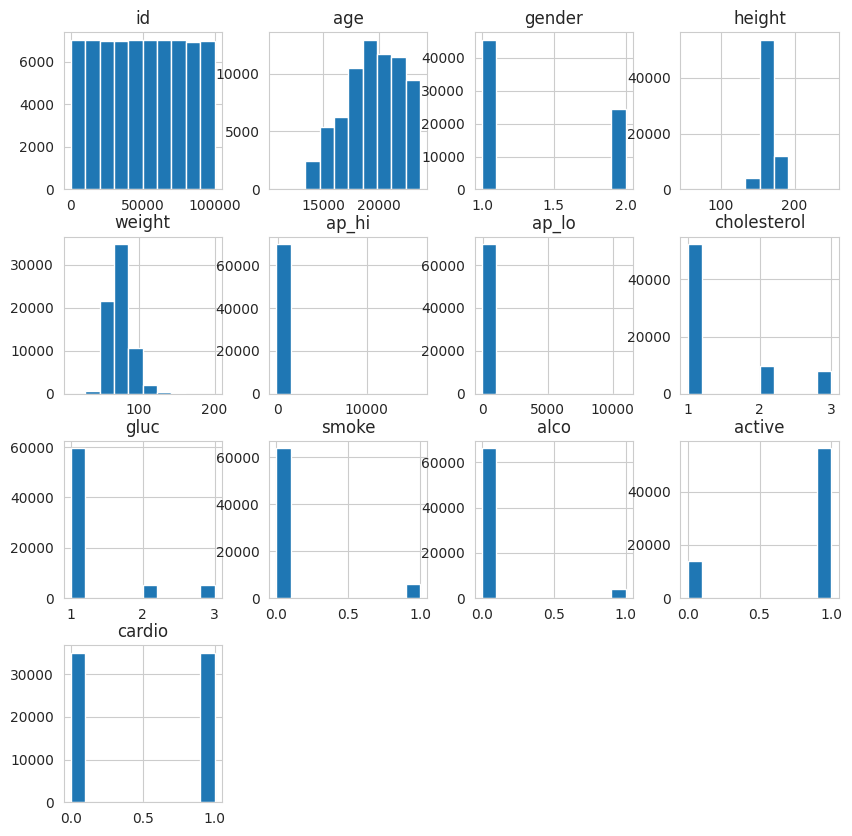

In [ ]:
from sklearn.preprocessing import PowerTransformer

yeo_johnson_transformer= PowerTransformer(method='Yeo-Johnson', standardize=False)
pd.DataFrame(cardio_train[numerical_columns].hist(figsize=(10,10)))

In [ ]:
'''
Al parecer el metodo genera error en colab, ya que dicho metodo permite el uso de datos negativos

pd.DataFrame(
    yeo_johnson_transformer.fit_transform(cardio_train[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10,10))
'''

'\nAl parecer el metodo genera error en colab, ya que dicho metodo permite el uso de datos negativos\n\npd.DataFrame(\n    yeo_johnson_transformer.fit_transform(cardio_train[numerical_columns]),\n    columns=numerical_columns\n).hist(figsize=(10,10))\n'

# **Seguimiento de conversión de datos 3.2**



3.2 Instalar libreria de feature-engine

In [ ]:
pip install feature-engine



---



In [ ]:
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


3.2.1 Realizar una conversión a la columna "age" de dias a años

In [ ]:
cardio_train['age']=cardio_train['age']//365

In [ ]:
cardio_train['age'].head()

0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64

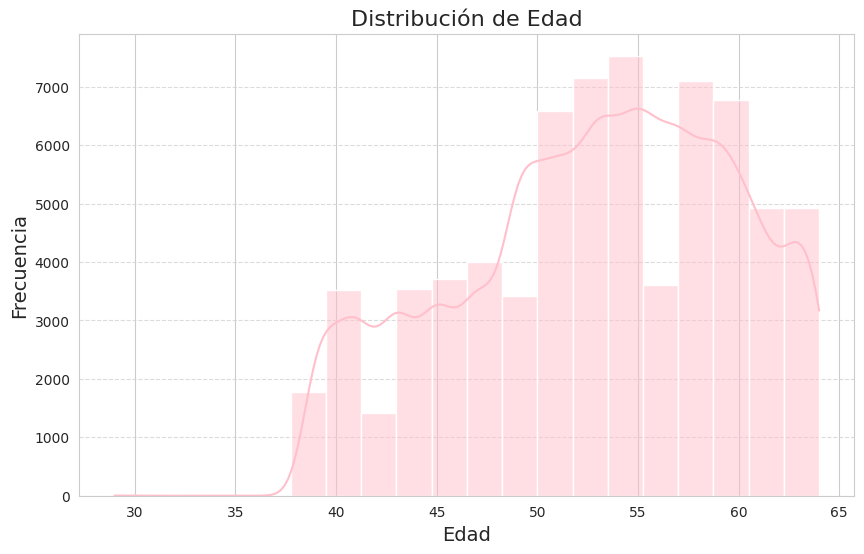

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=cardio_train, x='age', bins=20, color='pink', kde=True)
plt.title('Distribución de Edad', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Asigno rangos de edades
#cardio_train.loc[(cardio_train["age"] < 18), "new_age"] = "joven" #No hay rangos de edades para la categoria joven
cardio_train.loc[(cardio_train["age"] > 35) & (cardio_train["age"] < 55), "new_age"] = "adulto"
cardio_train.loc[(cardio_train["age"] >= 55), "new_age"] = "viejo"

In [ ]:
cardio_train.loc[cardio_train["ap_hi"] <=119, "BloodPressure_hi"] = "Normal" # No hay rangos de edades para la categoría joven
cardio_train.loc[(cardio_train["ap_hi"] > 120) & (cardio_train["ap_hi"] <= 129), "BloodPressure_hi"] = "Elevated"
cardio_train.loc[(cardio_train["ap_hi"] >= 130) & (cardio_train["ap_hi"] <= 139), "BloodPressure_hi"] = "Stage_1"
cardio_train.loc[cardio_train["ap_hi"] >= 140, "BloodPressure_hi"] = "Stage_2"

In [ ]:
cardio_train.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BloodPressure_hi
0,0,50,2,168,62,110,80,1,1,0,0,1,0,adulto,Normal
1,1,55,1,156,85,140,90,3,1,0,0,1,1,viejo,Stage_2
2,2,51,1,165,64,130,70,3,1,0,0,0,1,adulto,Stage_1


3.2.1 Realizar One Hot Enconding

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer  # class to help make dummy variables
from functools import reduce

class DummifyAgeFactor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None

    def parse_age_factors(self, comma_sep_factors):
        ''' adulto,viejo -> ['adulto','viejo'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []

    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_age_factors))  # create dummy variable for each
        return self

    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_age_factors))

In [ ]:
drf = DummifyAgeFactor()

age = drf.fit_transform(cardio_train['new_age']) # It is applied one-hot enconding to the column called

print(age.shape)

pd.DataFrame(age, columns=drf.label_binarizer.classes_)

(70000, 2)


,adulto,viejo
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
69995,1,0
69996,0,1
69997,1,0
69998,0,1


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer  # class to help make dummy variables
from functools import reduce

class Dummifyap_hiFactor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None

    def parse_hi_factors(self, comma_sep_factors):
        ''' Normal,Elevated,Stage_1,Stage_2 -> ['Normal','Elevated',Stage_1,Stage_2] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []

    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_hi_factors))  # create dummy variable for each
        return self

    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_hi_factors))

In [ ]:
drf = Dummifyap_hiFactor()

ap_hi = drf.fit_transform(cardio_train['BloodPressure_hi']) # It is applied one-hot enconding to the column called

print(ap_hi.shape)

pd.DataFrame(ap_hi, columns=drf.label_binarizer.classes_)

(70000, 4)


,elevated,normal,stage_1,stage_2
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
69995,0,0,0,0
69996,0,0,0,1
69997,0,0,0,1
69998,0,0,1,0




---



3.2.2 Añadir una nueva columna de BMI

In [ ]:
cardio_train['BMI']=cardio_train['weight']/(cardio_train['height']/100)**2   #Calculo general del BMI

In [ ]:
cardio_train.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BloodPressure_hi,BMI
0,0,50,2,168,62,110,80,1,1,0,0,1,0,adulto,Normal,21.967120
1,1,55,1,156,85,140,90,3,1,0,0,1,1,viejo,Stage_2,34.927679
2,2,51,1,165,64,130,70,3,1,0,0,0,1,adulto,Stage_1,23.507805


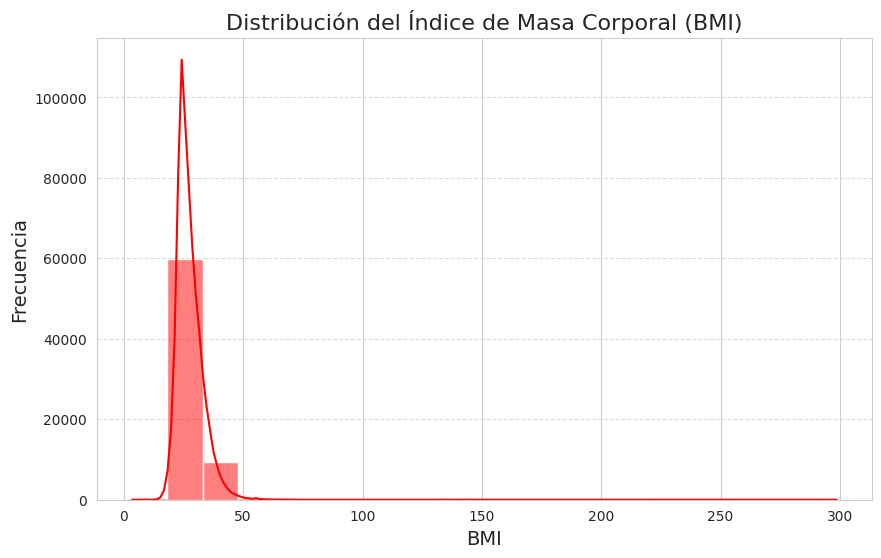

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=cardio_train, x='BMI', bins=20, color='Red', kde=True)
plt.title('Distribución del Índice de Masa Corporal (BMI)', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


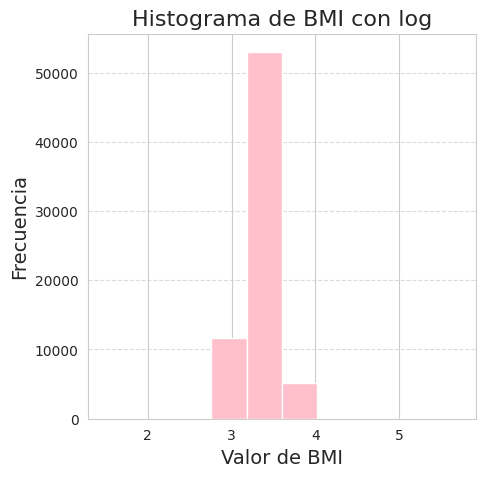

In [ ]:
cardio_train['BMI'].map(np.log1p).hist(figsize=(5, 5), color=['pink'])
plt.title('Histograma de BMI con log', fontsize=16)
plt.xlabel('Valor de BMI', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
cardio_train.loc[(cardio_train["BMI"] < 18.5), "NEW_BMI"] = "Bajo"
cardio_train.loc[(cardio_train["BMI"] >= 18.5) & (cardio_train["BMI"] <= 24.99) ,"NEW_BMI"] = "Normal"
cardio_train.loc[(cardio_train["BMI"] >= 25) & (cardio_train["BMI"] <= 29.99) ,"NEW_BMI"]= "Excesopeso"
cardio_train.loc[(cardio_train["BMI"] >= 30), "NEW_BMI"] = "Obeso"

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer  # class to help make dummy variables
from functools import reduce

class DummifyBMIFactor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None

    def parse_bmi_factors(self, comma_sep_factors):
        ''' Bajo,Normal,Excesopeso,Obeso -> ['Bajo','Normal','Excesopeso','Obeso'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []

    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_bmi_factors))
        return self

    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_bmi_factors))

In [ ]:
drf = DummifyBMIFactor()

bmi = drf.fit_transform(cardio_train['NEW_BMI'])

print(bmi.shape)

pd.DataFrame(bmi, columns=drf.label_binarizer.classes_)

(70000, 4)


,bajo,excesopeso,normal,obeso
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
69995,0,1,0,0
69996,0,0,0,1
69997,0,0,0,1
69998,0,1,0,0




---
SUGERENCIA PARA MANEJO DE VALORES


In [ ]:
 #Definir los rangos máximos y mínimos
ap_hi_max = 139  # Valor máximo para ap_hi en Hypertension Stage 1
ap_lo_max = 89   # Valor máximo para ap_lo en Hypertension Stage 1

# Filtrar el DataFrame para eliminar valores atípicos
cardio_train_cleaned = cardio_train[(cardio_train['ap_hi'] >= 0) & (cardio_train['ap_hi'] <= ap_hi_max) &
                (cardio_train['ap_lo'] >= 0) & (cardio_train['ap_lo'] <= ap_lo_max)]

# Cardio_cleaned ahora contiene solo las filas que cumplen con los rangos establecidos
#----- Me falta definir los rangos---------------------------------#



---



3.2.3 Conversión de caracteristicas de genero

In [ ]:
cardio_train['Women'] = cardio_train['gender'] == 1

In [ ]:
cardio_train['gender']

0        2
1        1
2        1
3        2
4        1
        ..
69995    2
69996    1
69997    2
69998    1
69999    1
Name: gender, Length: 70000, dtype: int64

In [ ]:
cardio_train['Women']

0        False
1         True
2         True
3        False
4         True
         ...  
69995    False
69996     True
69997    False
69998     True
69999     True
Name: Women, Length: 70000, dtype: bool

In [ ]:
del cardio_train['gender']

In [ ]:
cardio_train.head()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BloodPressure_hi,BMI,NEW_BMI,Women
0,0,50,168,62,110,80,1,1,0,0,1,0,adulto,Normal,21.967120,Normal,False
1,1,55,156,85,140,90,3,1,0,0,1,1,viejo,Stage_2,34.927679,Obeso,True
2,2,51,165,64,130,70,3,1,0,0,0,1,adulto,Stage_1,23.507805,Normal,True
3,3,48,169,82,150,100,1,1,0,0,1,1,adulto,Stage_2,28.710479,Excesopeso,False
4,4,47,156,56,100,60,1,1,0,0,0,0,adulto,Normal,23.011177,Normal,True


In [ ]:
cardio_train= cardio_train.drop(columns = ['age', 'id'], axis = 1)
cardio_train

,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BloodPressure_hi,BMI,NEW_BMI,Women
0,168,62,110,80,1,1,0,0,1,0,adulto,Normal,21.967120,Normal,False
1,156,85,140,90,3,1,0,0,1,1,viejo,Stage_2,34.927679,Obeso,True
2,165,64,130,70,3,1,0,0,0,1,adulto,Stage_1,23.507805,Normal,True
3,169,82,150,100,1,1,0,0,1,1,adulto,Stage_2,28.710479,Excesopeso,False
4,156,56,100,60,1,1,0,0,0,0,adulto,Normal,23.011177,Normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,168,76,120,80,1,1,1,0,1,0,adulto,NaN,26.927438,Excesopeso,False
69996,158,126,140,90,2,2,0,0,1,1,viejo,Stage_2,50.472681,Obeso,True
69997,183,105,180,90,3,1,0,1,0,1,adulto,Stage_2,31.353579,Obeso,False
69998,163,72,135,80,1,2,0,0,0,1,viejo,Stage_1,27.099251,Excesopeso,True


In [ ]:
categorical_types = ['O']  # Just the "object" type

categorical_columns = cardio_train.select_dtypes(include=categorical_types).columns.tolist()

#categorical_columns.remove('Diagnosis')  # our response variable

for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(cardio_train[categorical_column].value_counts(dropna=False))


new_age
adulto    38741
viejo     31255
NaN           4
Name: new_age, dtype: int64
BloodPressure_hi
NaN         27699
Stage_2     19401
Normal      13038
Stage_1      9273
Elevated      589
Name: BloodPressure_hi, dtype: int64
NEW_BMI
Normal        25647
Excesopeso    25036
Obeso         18474
Bajo            651
NaN             192
Name: NEW_BMI, dtype: int64


In [ ]:
cardio_train.head()

,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,BloodPressure_hi,BMI,NEW_BMI,Women
0,168,62,110,80,1,1,0,0,1,0,adulto,Normal,21.967120,Normal,False
1,156,85,140,90,3,1,0,0,1,1,viejo,Stage_2,34.927679,Obeso,True
2,165,64,130,70,3,1,0,0,0,1,adulto,Stage_1,23.507805,Normal,True
3,169,82,150,100,1,1,0,0,1,1,adulto,Stage_2,28.710479,Excesopeso,False
4,156,56,100,60,1,1,0,0,0,0,adulto,Normal,23.011177,Normal,True


In [ ]:
binary_features = [  # aggregate all binary columns in a list
    'gluc', 'smoke', 'active', 'Women']

**Entranamiento**

In [ ]:
from sklearn.model_selection import train_test_split

X, y = cardio_train.drop(['cardio'], axis=1), cardio_train['cardio']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [ ]:
y_train.value_counts(normalize=True)

0    0.500304
1    0.499696
Name: cardio, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.500286
1    0.499714
Name: cardio, dtype: float64

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer

# deal with risk factors

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['new_age'])),
        ('dummify', DummifyAgeFactor())
    ]
)

# deal with binary columns

binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))  # assume missing values are not present
    ]
)

# deal with numerical columns

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

In [ ]:
def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an ExtraTreesClassifier model and
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    base_model = ExtraTreesClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [ ]:
simple_grid_search(x_train, y_train, x_test, y_test, risk_factor_pipeline)

Parsing took 0.39 seconds
Training took 83.10 seconds
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      7004
           1       0.61      0.55      0.58      6996

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.60      0.60      0.60     14000

Overall took 83.14 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer

# deal with risk factors

risk_factor_pipeline2 = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['NEW_BMI'])),
        ('dummify', DummifyBMIFactor())
    ]
)

# deal with binary columns

binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))  # assume missing values are not present
    ]
)

# deal with numerical columns

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

In [ ]:
def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an ExtraTreesClassifier model and
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    base_model = ExtraTreesClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [ ]:
simple_grid_search(x_train, y_train, x_test, y_test, risk_factor_pipeline2)

Parsing took 0.43 seconds
Training took 63.13 seconds
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      7004
           1       0.56      0.70      0.62      6996

    accuracy                           0.58     14000
   macro avg       0.58      0.58      0.57     14000
weighted avg       0.58      0.58      0.57     14000

Overall took 63.19 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer

# deal with risk factors

risk_factor_pipeline3 = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['BloodPressure_hi'])),
        ('dummify', Dummifyap_hiFactor())
    ]
)

# deal with binary columns

binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))  # assume missing values are not present
    ]
)

# deal with numerical columns

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

In [ ]:
def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an ExtraTreesClassifier model and
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    base_model = ExtraTreesClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [ ]:
simple_grid_search(x_train, y_train, x_test, y_test, risk_factor_pipeline3)

Parsing took 0.43 seconds
Training took 69.25 seconds
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      7004
           1       0.76      0.63      0.69      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.71     14000
weighted avg       0.72      0.72      0.71     14000

Overall took 69.28 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [ ]:
simple_grid_search(x_train, y_train, x_test, y_test, binary_pipeline)

Parsing took 0.03 seconds
Training took 73.39 seconds
              precision    recall  f1-score   support

           0       0.53      0.73      0.62      7004
           1       0.57      0.36      0.44      6996

    accuracy                           0.55     14000
   macro avg       0.55      0.55      0.53     14000
weighted avg       0.55      0.55      0.53     14000

Overall took 73.43 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [ ]:
simple_fe = FeatureUnion([  # put all of our features together
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
])

simple_fe.fit_transform(x_train, y_train).shape

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.62 seconds
Training took 83.56 seconds
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      7004
           1       0.60      0.60      0.60      6996

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.60      0.60      0.60     14000

Overall took 83.61 seconds


In [ ]:
simple_fe = FeatureUnion([  # put all of our features together
    ('risk_factors', risk_factor_pipeline2),
    ('binary_pipeline', binary_pipeline),
])

simple_fe.fit_transform(x_train, y_train).shape

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.42 seconds
Training took 93.57 seconds
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      7004
           1       0.60      0.52      0.56      6996

    accuracy                           0.59     14000
   macro avg       0.59      0.59      0.58     14000
weighted avg       0.59      0.59      0.58     14000

Overall took 93.63 seconds


**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

risk_factor_pipeline = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['new_age'])),
        ('dummify', DummifyAgeFactor()),
        ('mutual_info', SelectKBest(mutual_info_classif, k=2)),  # feature selection based on mutual information
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 1.70 seconds
Training took 86.73 seconds
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      7004
           1       0.60      0.60      0.60      6996

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.60      0.60      0.60     14000

Overall took 86.77 seconds


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

risk_factor_pipeline2 = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['NEW_BMI'])),
        ('dummify', DummifyBMIFactor()),
        ('mutual_info', SelectKBest(mutual_info_classif, k=2)),  # feature selection based on mutual information
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline2),
    ('binary_pipeline', binary_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 4.14 seconds
Training took 121.35 seconds
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      7004
           1       0.60      0.52      0.56      6996

    accuracy                           0.58     14000
   macro avg       0.59      0.58      0.58     14000
weighted avg       0.59      0.58      0.58     14000

Overall took 121.41 seconds


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

risk_factor_pipeline3 = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['BloodPressure_hi'])),
        ('dummify', Dummifyap_hiFactor()),
        ('mutual_info', SelectKBest(mutual_info_classif, k=2)),  # feature selection based on mutual information
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline3),
    ('binary_pipeline', binary_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 1.72 seconds
Training took 88.75 seconds
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      7004
           1       0.81      0.51      0.63      6996

    accuracy                           0.70     14000
   macro avg       0.73      0.70      0.69     14000
weighted avg       0.73      0.70      0.69     14000

Overall took 88.79 seconds


In [ ]:
from sklearn.feature_selection import chi2

risk_factor_pipeline = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['new_age'])),
        ('dummify', DummifyAgeFactor()),
        ('chi2', SelectKBest(chi2, k=2))  # use chi2 to select features
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.72 seconds
Training took 103.26 seconds
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      7004
           1       0.60      0.60      0.60      6996

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.60      0.60      0.60     14000

Overall took 103.30 seconds


In [ ]:
from sklearn.feature_selection import chi2

risk_factor_pipeline2 = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['NEW_BMI'])),
        ('dummify', DummifyBMIFactor()),
        ('chi2', SelectKBest(chi2, k=2))  # use chi2 to select features
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 2.60 seconds
Training took 128.26 seconds
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      7004
           1       0.60      0.52      0.56      6996

    accuracy                           0.58     14000
   macro avg       0.59      0.58      0.58     14000
weighted avg       0.59      0.58      0.58     14000

Overall took 128.31 seconds


In [ ]:
from sklearn.feature_selection import chi2

risk_factor_pipeline3 = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['BloodPressure_hi'])),
        ('dummify', Dummifyap_hiFactor()),
        ('chi2', SelectKBest(chi2, k=2))  # use chi2 to select features
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 2.27 seconds
Training took 105.63 seconds
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      7004
           1       0.60      0.52      0.56      6996

    accuracy                           0.58     14000
   macro avg       0.59      0.58      0.58     14000
weighted avg       0.59      0.58      0.58     14000

Overall took 105.72 seconds


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['new_age'])),
        ('dummify', DummifyAgeFactor()),
        # use a decision tree classifier to select features
        ('tree_selector', SelectFromModel(max_features=2, estimator=DecisionTreeClassifier()))
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline)
])

# let's stop here
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 1.12 seconds
Training took 84.74 seconds
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      7004
           1       0.60      0.60      0.60      6996

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.60      0.60      0.60     14000

Overall took 84.79 seconds


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

risk_factor_pipeline2 = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['NEW_BMI'])),
        ('dummify', DummifyBMIFactor()),
        # use a decision tree classifier to select features
        ('tree_selector', SelectFromModel(max_features=2, estimator=DecisionTreeClassifier()))
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline)
])

# let's stop here
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 2.18 seconds
Training took 89.26 seconds
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      7004
           1       0.60      0.52      0.56      6996

    accuracy                           0.58     14000
   macro avg       0.59      0.58      0.58     14000
weighted avg       0.59      0.58      0.58     14000

Overall took 89.33 seconds


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

risk_factor_pipeline2 = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['BloodPressure_hi'])),
        ('dummify', Dummifyap_hiFactor()),
        # use a decision tree classifier to select features
        ('tree_selector', SelectFromModel(max_features=2, estimator=DecisionTreeClassifier()))
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline)
])

# let's stop here
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 2.54 seconds
Training took 89.48 seconds
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      7004
           1       0.60      0.52      0.56      6996

    accuracy                           0.58     14000
   macro avg       0.59      0.58      0.58     14000
weighted avg       0.59      0.58      0.58     14000

Overall took 89.55 seconds
